## Esercizio A

Data la matrice
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.

In [1]:
import numpy as np
from scipy.linalg import lu,solve

def checkIfGaussCanBeApplied(A):
    if A.shape[0] != A.shape[1]:
        print("matrice non quadrata")
        return False
    
    for i in range(A.shape[0]+1):
        B = A[:i,:i]
        if np.linalg.det(B) == 0:
            print("determinante sotto matrice princiapale = 0, sottomatrice analizzata =",B)
            return False
    return True

def GaussFactor(A):
    if checkIfGaussCanBeApplied(A)==False:
        return None,None,None
    P,L,U = lu(A)
    
    return P,L,U

def det(A):
    P,L,U = GaussFactor(A)
    if P.all() == None:
        return None
    # dato che P*A=L*U => det(A)=det(L)*det(U)/det(P)
    return np.linalg.det(L)*np.linalg.det(U)/np.linalg.det(P)

def inv(A):
    # A*A^-1 = I*P^-1 quindi => 
    # L*Y = I*P^-1
    # U*A^-1 = Y
    P,L,U = GaussFactor(A)
    if P.all() == None:
        return None
    Y=solve(L,np.eye(A.shape[0])@P.T)
    return solve(U,Y)

In [2]:
A = np.array([[4.5 ,1,3,2],[1,-8,2,1],[-1,-2,-3,-1],[2,6,0,1]])
detA=det(A)
print("det calcolato => ",detA,"det effettivo => ",np.linalg.det(A))
print("inversa calcolata = >\n",inv(A),"\ninv effettiva => \n",np.linalg.inv(A))

det calcolato =>  58.000000000000036 det effettivo =>  58.000000000000036
inversa calcolata = >
 [[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]] 
inv effettiva => 
 [[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]


## Esercizio  B

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=4, \quad x_3=0, \quad x_4=5\\
y_1=0, \quad y_2=0, \quad y_3=4, \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 2**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 3**]


**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$

In [13]:
def findCenter(a1,a2):
    return -a1/2,-a2/2
def findR(a1,a2,a3):
    return np.sqrt((a1**2/4)+(a2**2/4)-a3)

In [14]:
x=np.array([0,4,0,5])
y=np.array([0,0,4,6])
# primo caso (0,0) => a1,a2,a3 = 0
# secondo caso (4,0) => 16+4a1+a3=0 => a3 = -4(4+a1) => a3 = -4(4-45-6a2) => 4*41 + 24a2 = a3
# terzo caso (0,4) => 16+4a2+a3=0 => 16 + 4a2+4*41+24a2 = 0 => 164+16 +28a2 = 0 => a2 = 180/28
# quarto caso (5,6) => 25+36+5a1+6a2+a3 = 0 => 61+5a1+6a2-16-4a1=0 => a1 +45 +6a2 = 0 => a1 = -45-6a2

a2=180/28
a1=-45-6*a2
a3=164+24*a2

cFunc = lambda xi,yi : xi**2+yi**2+xi*a1+xi*a2+a3


## Esercizio C
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def rettaRegressione(x,y):
    # Calcola la media di x e y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calcola la pendenza m
    m = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x) ** 2)

    # Calcola l'intercetta c
    c = mean_y - m * mean_x

    # Equazione della retta di regressione
    regression_line = m * x + c
    plt.scatter(x,y,color="blue",label="dati")
    plt.plot(x,regression_line,label="regression line")
    return regression_line

def parabolaMinimiQuadrati(x,y):
    # Esegui una regressione polinomiale di grado 2
    coefficients = np.polyfit(x, y, 2)

    # Genera i valori y previsti dalla parabola
    parabolic_line = np.polyval(coefficients, x)

    # Raffigura i dati e la parabola dei minimi quadrati
    plt.plot(x, parabolic_line, color='red', label='Parabola dei minimi quadrati')

    # Aggiungi etichette agli assi e una legenda
    plt.xlabel('Variabile indipendente (x)')
    plt.ylabel('Variabile dipendente (y)')
    

    return parabolic_line

def exponential_bases(x, a, b, c):
        return a + b * np.exp(-x) + c * np.exp(-2*x)

def approxExp(x,y):
    # Applicazione del metodo dei minimi quadrati
    params, covariance = curve_fit(exponential_bases, x, y)

    # Estraiamo i parametri ottimali
    a, b, c = params

    # Stampa i parametri ottimali
    print("a =", a)
    print("b =", b)
    print("c =", c)

    expbases= exponential_bases(x, *params)
    # Raffigurazione dei dati e della curva adattata
    plt.plot(x,expbases, color='orange', label='Curva adattata')
    plt.legend()
    plt.show()
    return expbases

def calcNormEuclide(residuoLinearRegression,residuoParabola,residuoApprox):
    norm=np.array([np.sum(residuoLinearRegression**2),np.sum(residuoParabola**2),np.sum(residuoApprox**2)])
    print("norma Euclidea linear regression => {:e}".format(norm[0]))
    print("norm Euclidea parabola => {:e}".format(norm[1]))
    print("norm Euclidea approx => {:e}".format(norm[2]))
    
    print("la più accurata è => {:e}".format(np.min(norm)))

a = 0.029690063631780002
b = 0.032581558139172156
c = -0.061763898901262757


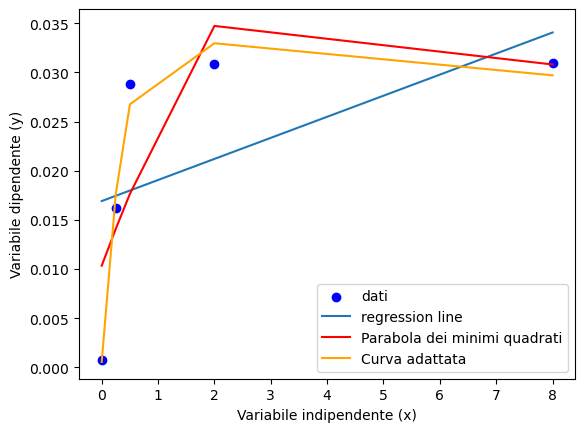

norma Euclidea linear regression => 4.848328e-04
norm Euclidea parabola => 2.364636e-04
norm Euclidea approx => 1.224973e-05
la più accurata è => 1.224973e-05


In [16]:
x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

y_ret=rettaRegressione(x,y)

y_parab=parabolaMinimiQuadrati(x,y)

y_approx=approxExp(x,y)

calcNormEuclide(y-y_ret,y-y_parab,y-y_approx)

# Esercizio D

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.

In [17]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    
    
     return L@y

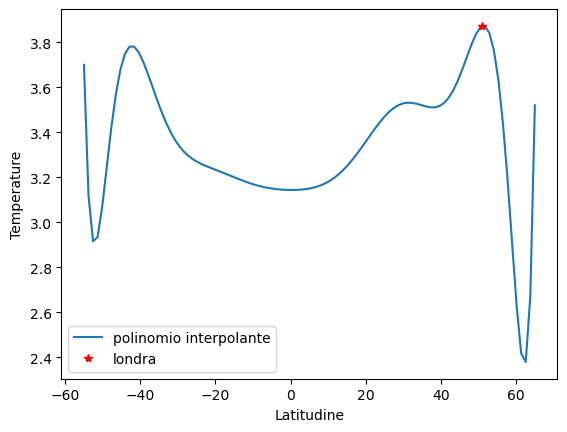

In [18]:
L=np.array([-55	,-45	,-35	,-25,	-15,	-5,	5	,15	,25,	35,	45,	55	,65])
T = np.array([3.7,	3.7	,3.52	,3.27	,3.2	,3.15	,3.15	,3.25	,3.47	,3.52	,3.65	,3.67,	3.52])

xx=np.linspace(np.min(L),np.max(L),100).reshape(-1,)
pol=InterpL(L,T,xx)

london = np.array([51])
londoPol=InterpL(L,T,london)


plt.plot(xx,pol,label="polinomio interpolante")
plt.plot(london,londoPol,"r*",label="londra")
plt.ylabel("Temperature")
plt.xlabel("Latitudine")
plt.legend()
plt.show()

## Esercizio E

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare 

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

- Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

 

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]

In [19]:
def my_newtonSys(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema F(x)=0
  mediante il metodo di Newton.

  Parametri
  ----------
  fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
  jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
    Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None, None,None

  s = -np.linalg.solve(matjac,fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 =x0+s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]

  while it<=nmax and np.linalg.norm(fx1,1)>=tolf and np.linalg.norm(s,1)>=tolx*np.linalg.norm(x1,1):
    x0 =x1
    it += 1
    matjac = jac(x0)
    if np.linalg.det(matjac) == 0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None

   
    s =-np.linalg.solve(matjac,fun(x0))

    # Aggiornamento della soluzione
    x1 = x0+s 
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm


def my_newtonSys_corde(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton, con variante delle corde, in cui lo Jacobiano non viene calcolato
  ad ogni iterazione, ma rimane fisso, calcolato nell'iterato iniziale x0.
  
 Parametri
  ----------
  fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
  jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore tra due soluzioni successive.
  tolf : float
    Parametro di tolleranza sul valore della funzione.
  nmax : int
    Numero massimo di iterazioni.
    
  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)   
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None, None,None
  s = -np.linalg.solve(matjac,fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0+s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]

  while it<=nmax and np.linalg.norm(fun(x1),1)>=tolf and np.linalg.norm(s,1)>=tolx*np.linalg.norm(x1,1):
    x0 = x1
    it += 1
   
   
    if np.linalg.det(matjac) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None, None,None
    
     
    
    s = -np.linalg.solve(matjac,fun(x0))

    # Aggiornamento della soluzione
    x1 =  x0+s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

def my_newtonSys_sham(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton, con variante delle shamanski, in cui lo Jacobiano viene
  aggiornato ogni un tot di iterazioni, deciso dall'utente.

  Parametri
  ----------
  fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
  jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore tra due soluzioni successive.
  tolf : float
    Parametro di tolleranza sul valore della funzione.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None,None,None

  s = -np.linalg.solve(matjac,fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]
  update=10  #Numero di iterazioni durante le quali non si aggiorna la valutazione dello Jacobiano nell'iterato attuale
  while it<=nmax and np.linalg.norm(fun(x1),1)>=tolf and np.linalg.norm(s,1)>=tolx*np.linalg.norm(x1,1):
    x0 =  x1
    it += 1
    if it%update==0:   #Valuto la matrice di iterazione nel nuovo iterato ogni "update" iterazioni
        matjac = jac(x0)
   
        if np.linalg.det(matjac) == 0:
           print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
           return None,None,None
        else:
         
           s = -np.linalg.solve(matjac,fun(x0))
    else:
          
           s = -np.linalg.solve(matjac,fun(x0))

    # Aggiornamento della soluzione
    x1 = x0+s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

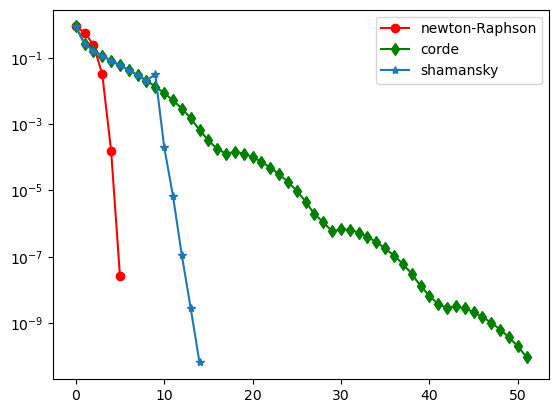

[2. 3.]
[2. 3.]
[2. 3.]
6
52
15


In [20]:
fun=lambda x:[
    x[0]**2+x[0]*x[1] - 10,
    x[1]+3*x[0]*x[1]**2-57
]
jac = lambda x:[[
    2*x[0]+x[1],x[0]],[
    3*x[1]**2,1+6*x[0]*x[1]
]]
nMax=500
tolx=1e-10
tolf=tolx
x0=np.array([10,1])
xN,itN,errN=my_newtonSys(fun,jac,x0,tolx,tolf,nMax)
xC,itC,errC=my_newtonSys_corde(fun,jac,x0,tolx,tolf,nMax)
xS,itS,errS=my_newtonSys_sham(fun,jac,x0,tolx,tolf,nMax)
plt.semilogy(range(itN),errN,"r-o",range(itC),errC,"g-d",range(itS),errS,"-*")
plt.legend(["newton-Raphson","corde","shamansky"])
plt.show()
print(xN)
print(xC)
print(xS)
print(itN)
print(itC)
print(itS)
